# Data Mining Project - Team 7
## Telco Customer Churn Classification

# Reading and exploring the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd '/content/drive/MyDrive/data_mining_project'

/content/drive/MyDrive/data_mining_project


In [ ]:
%ls

data_mining_project_team_7.ipynb  dataset/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 7)
pd.set_option('display.max_columns', None)

In [ ]:
# reading the dataset
data_ = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data = data_.iloc[:, 1:].copy()
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 20)

## Checking for duplicate and missing values

In [ ]:
data.duplicated().sum()

22

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(7021, 20)

In [ ]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [ ]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [ ]:
data.TotalCharges.fillna(data.TotalCharges.mean(), inplace=True)

## Plot data distribution for numeric columns

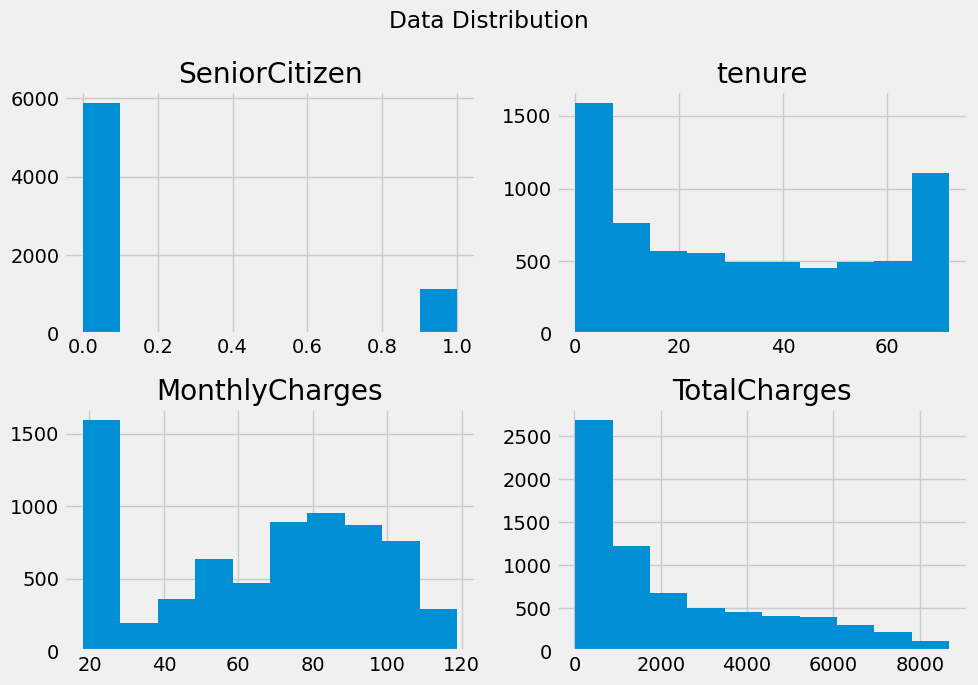

In [ ]:
data.hist()
plt.suptitle('Data Distribution')
plt.tight_layout();

## Plot class distribution

In [ ]:
data.Churn.value_counts()

Churn
No     5164
Yes    1857
Name: count, dtype: int64

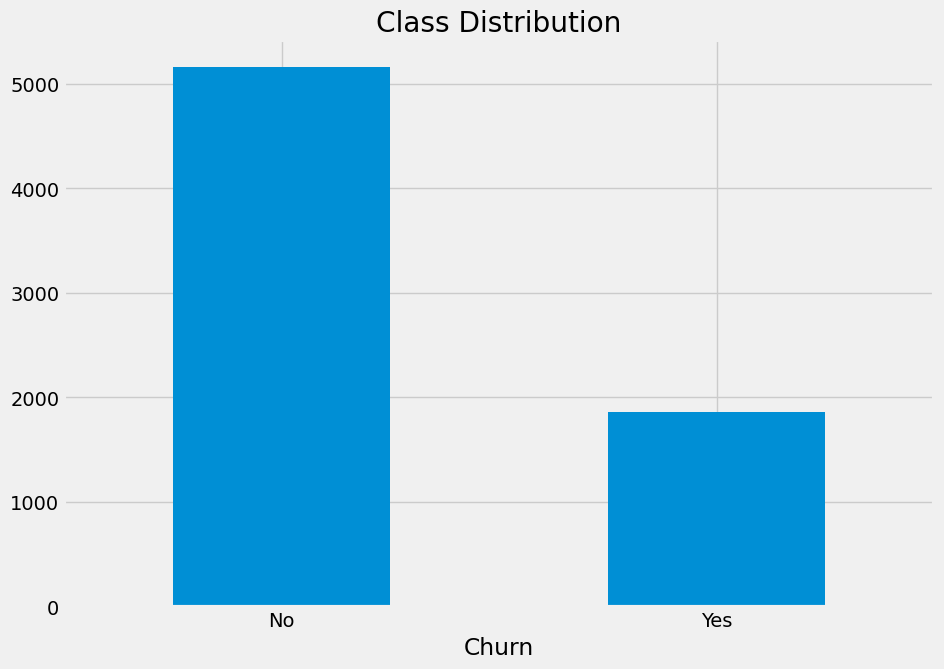

In [ ]:
data.Churn.value_counts().plot(kind='bar', title='Class Distribution', rot=0);

## Analyse numeric and catgorical features

In [ ]:
numeric_data = data.select_dtypes(include=np.number)
categorical_data = data.select_dtypes(include=object)

In [ ]:
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.353388,2265.044136,18.80,411.15,1410.25,3801.7,8684.80


In [ ]:
for col in categorical_data.columns:
  print(f'{col}: {categorical_data[col].unique()}\n{categorical_data[col].value_counts()}\n{"--"*20}\n')

gender: ['Female' 'Male']
gender
Male      3541
Female    3480
Name: count, dtype: int64
----------------------------------------

Partner: ['Yes' 'No']
Partner
No     3619
Yes    3402
Name: count, dtype: int64
----------------------------------------

Dependents: ['No' 'Yes']
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
----------------------------------------

PhoneService: ['No' 'Yes']
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
----------------------------------------

MultipleLines: ['No phone service' 'No' 'Yes']
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------

InternetService: ['DSL' 'Fiber optic' 'No']
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
----------------------------------------

OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineSecurity
No                     3490
Y

# Transforming numeric and categorical features

In [ ]:
data['Churn'] = data['Churn'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
numeric_columns = data.iloc[:, :-1].select_dtypes(include=np.number).columns
cat_columns = data.iloc[:, :-1].select_dtypes(include=object).columns

In [ ]:
print(f'Numeric Columns: {numeric_columns}\n\nCategorical Columns: {cat_columns}')

Numeric Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

len(X_train), len(X_test), len(y_train), len(y_test)

(5616, 1405, 5616, 1405)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False), cat_columns),
    (MinMaxScaler(), numeric_columns),
    remainder='passthrough'
)

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

## Fitting data to ML models

In [ ]:
# evaluation function
from sklearn.metrics import precision_recall_fscore_support
from typing import Any

def evaluate(y_true: Any, y_pred: Any) -> dict[str, float]:
  accuracy = sum(y_true == y_pred) / len(y_true)
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true=y_true, y_pred=y_pred, average='binary')
  return {'accuracy': round(accuracy*100, 2),
          'precision': round(precision*100, 2),
          'recall': round(recall*100, 2),
          'f1-score': round(f1_score*100, 2)}

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_transformed, y_train)

lr_test_preds = lr.predict(X_test_transformed)

lr_train_score = evaluate(y_train, lr.predict(X_train_transformed))
lr_test_score = evaluate(y_test, lr_test_preds)

In [ ]:
# scores
print(f"""
--- Logistic Regression ---
Train Score: {lr_train_score}
Test Score: {lr_test_score}""")


--- Logistic Regression ---
Train Score: {'accuracy': 74.27, 'precision': 50.86, 'recall': 79.93, 'f1-score': 62.16}
Test Score: {'accuracy': 76.65, 'precision': 53.87, 'recall': 82.26, 'f1-score': 65.11}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train_transformed, y_train)

dt_test_preds = dt.predict(X_test_transformed)

dt_train_score = evaluate(y_train, dt.predict(X_train_transformed))
dt_test_score = evaluate(y_test, dt_test_preds)

In [ ]:
# scores
print(f"""
--- Decision Tree ---
Train Score: {dt_train_score}
Test Score: {dt_test_score}""")


--- Decision Tree ---
Train Score: {'accuracy': 99.8, 'precision': 99.26, 'recall': 100.0, 'f1-score': 99.63}
Test Score: {'accuracy': 73.17, 'precision': 49.31, 'recall': 48.12, 'f1-score': 48.71}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_transformed, y_train)

rf_test_preds = rf.predict(X_test_transformed)

rf_train_score = evaluate(y_train, rf.predict(X_train_transformed))
rf_test_score = evaluate(y_test, rf_test_preds)

In [ ]:
# scores
print(f"""
--- Random Forest ---
Train Score: {rf_train_score}
Test Score: {rf_test_score}""")


--- Random Forest ---
Train Score: {'accuracy': 99.8, 'precision': 99.26, 'recall': 100.0, 'f1-score': 99.63}
Test Score: {'accuracy': 80.93, 'precision': 68.98, 'recall': 50.81, 'f1-score': 58.51}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

knn_test_preds = knn.predict(X_test_transformed)

knn_train_score = evaluate(y_train, knn.predict(X_train_transformed))
knn_test_score = evaluate(y_test, knn_test_preds)

In [ ]:
# scores
print(f"""
--- Random Forest ---
Train Score: {knn_train_score}
Test Score: {knn_test_score}""")


--- Random Forest ---
Train Score: {'accuracy': 83.3, 'precision': 70.7, 'recall': 62.9, 'f1-score': 66.57}
Test Score: {'accuracy': 78.01, 'precision': 59.63, 'recall': 52.42, 'f1-score': 55.79}


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_transformed, y_train)

xgb_test_preds = xgb.predict(X_test_transformed)

xgb_train_score = evaluate(y_train, xgb.predict(X_train_transformed))
xgb_test_score = evaluate(y_test, xgb_test_preds)

In [ ]:
# scores
print(f"""
--- XGBoost ---
Train Score: {xgb_train_score}
Test Score: {xgb_test_score}""")


--- XGBoost ---
Train Score: {'accuracy': 94.05, 'precision': 90.96, 'recall': 86.06, 'f1-score': 88.44}
Test Score: {'accuracy': 79.86, 'precision': 63.86, 'recall': 55.11, 'f1-score': 59.16}


## Defining model parameters for cross validation

In [ ]:
# Parameter grid for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Parameter grid for Decision Tree Classifier
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameter grid for Random Forest Classifier
rf_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameter grid for K-Nearest Neighbors Classifier
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Parameter grid for XGBoost Classifier
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [ ]:
classifiers = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42), lr_params),
    'Decision Tree': (DecisionTreeClassifier(class_weight='balanced', random_state=42), dt_params),
    'Random Forest': (RandomForestClassifier(class_weight='balanced', random_state=42), rf_params),
    'KNN': (KNeighborsClassifier(), knn_params),
    'XGBoost': (XGBClassifier(random_state=42), xgb_params)
}

### Use over sampling to balance the data

In [ ]:
# from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

sampled_models = {}
sampled_scores = {}

sampler = SMOTEENN()
X_train_resample, y_train_resample = sampler.fit_resample(X_train_transformed, y_train)

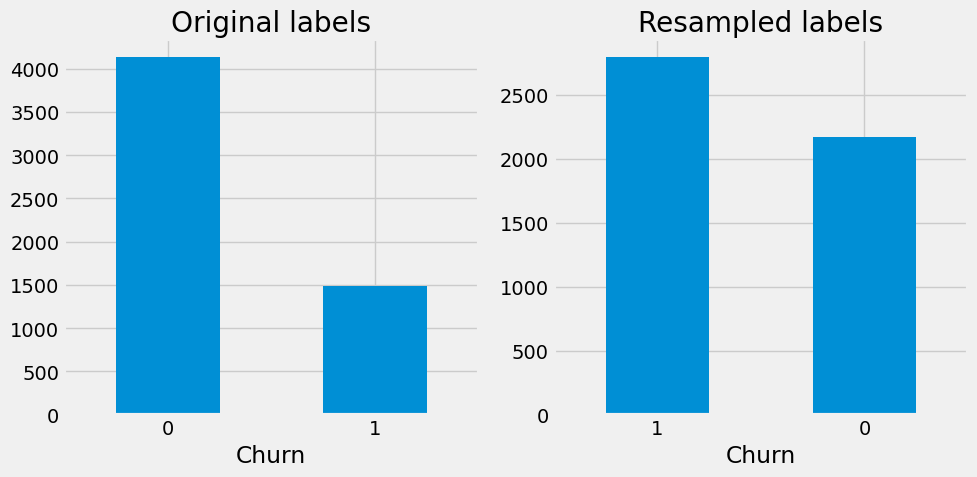

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Original labels', rot=0)

plt.subplot(1, 2, 2)
y_train_resample.value_counts().plot(kind='bar', title='Resampled labels', rot=0)
plt.tight_layout();

### Fitting resampled data to the models

In [ ]:
for clf_name, (model, _) in classifiers.items():
  model.fit(X_train_resample, y_train_resample)
  preds = model.predict(X_test_transformed)

  sampled_models[clf_name] = model
  sample_train_score = evaluate(y_train_resample, model.predict(X_train_resample))
  sample_test_score = evaluate(y_test, preds)
  sampled_scores[clf_name] = sample_test_score
  print(f'{clf_name} train score: {sample_train_score}')
  print(f'{clf_name} test score: {sample_test_score}\n')

Logistic Regression train score: {'accuracy': 91.29, 'precision': 93.01, 'recall': 91.41, 'f1-score': 92.2}
Logistic Regression test score: {'accuracy': 73.59, 'precision': 50.08, 'recall': 84.95, 'f1-score': 63.01}

Decision Tree train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Decision Tree test score: {'accuracy': 74.16, 'precision': 50.8, 'recall': 77.15, 'f1-score': 61.26}

Random Forest train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Random Forest test score: {'accuracy': 75.66, 'precision': 52.61, 'recall': 81.18, 'f1-score': 63.85}

KNN train score: {'accuracy': 97.74, 'precision': 96.43, 'recall': 99.68, 'f1-score': 98.03}
KNN test score: {'accuracy': 68.33, 'precision': 44.97, 'recall': 87.63, 'f1-score': 59.43}

XGBoost train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
XGBoost test score: {'accuracy': 76.94, 'precision': 54.36, 'recall': 80.38, 'f1-score': 

## Feature Extraction

In [ ]:
data_fex = data.copy()
data_fex = pd.get_dummies(data_fex, drop_first=True)
data_corr = data_fex.corr()['Churn'].sort_values(ascending=False)

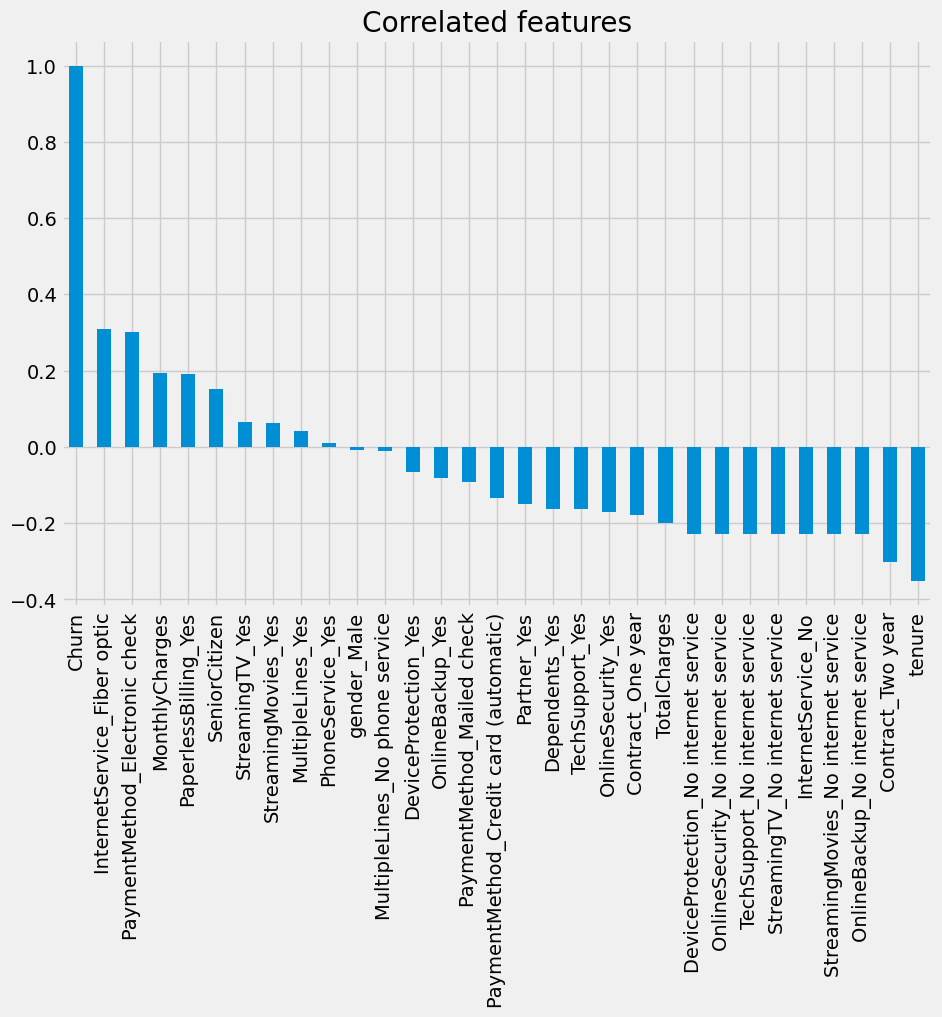

In [ ]:
data_corr[abs(data_corr) > 0.0].plot(kind='bar', title='Correlated features');

## Using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train_transformed)

# Evaluate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

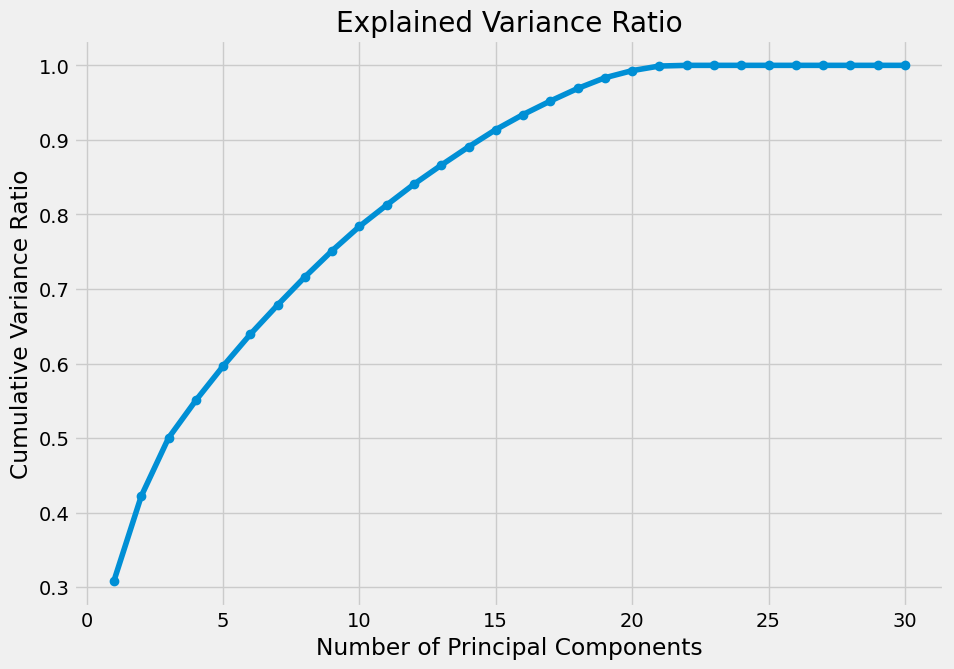

In [ ]:
# Plot explained variance ratio
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio');

In [ ]:
# Select number of principal components based on explained variance ratio
# Choose the number of components that explain a significant portion of the variance (e.g., 95%)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
n_components

17

In [ ]:
# Use selected number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resample)
X_test_pca = pca.transform(X_test_transformed)

In [ ]:
fex_models = {}
fex_scores = {}
for clf_name, (model, _) in classifiers.items():
  model.fit(X_train_pca, y_train_resample)
  preds = model.predict(X_test_pca)

  fex_models[clf_name] = model
  fex_train_score = evaluate(y_train_resample, model.predict(X_train_pca))
  fex_test_score = evaluate(y_test, preds)
  fex_scores[clf_name] = fex_test_score
  print(f'{clf_name} train score: {fex_train_score}')
  print(f'{clf_name} test score: {fex_test_score}\n')

Logistic Regression train score: {'accuracy': 90.21, 'precision': 92.3, 'recall': 90.12, 'f1-score': 91.2}
Logistic Regression test score: {'accuracy': 72.46, 'precision': 48.84, 'recall': 84.95, 'f1-score': 62.02}

Decision Tree train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Decision Tree test score: {'accuracy': 71.89, 'precision': 48.05, 'recall': 76.08, 'f1-score': 58.9}

Random Forest train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Random Forest test score: {'accuracy': 73.52, 'precision': 50.0, 'recall': 82.26, 'f1-score': 62.2}

KNN train score: {'accuracy': 97.16, 'precision': 95.54, 'recall': 99.61, 'f1-score': 97.53}
KNN test score: {'accuracy': 67.26, 'precision': 44.04, 'recall': 87.37, 'f1-score': 58.56}

XGBoost train score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
XGBoost test score: {'accuracy': 73.67, 'precision': 50.17, 'recall': 81.45, 'f1-score': 62.

## Cross Validation

In [ ]:
X_train_pca.shape, y_train_resample.shape

((4962, 17), (4962,))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

trained_models = {}
best_acc = 0.0
best_model = None

# kf = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=123)
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

for clf_name_, (_, params) in classifiers.items():
  for clf_name, clf in fex_models.items():
    if clf_name_ == clf_name:
      for train_idx, val_idx in kf.split(X_train_pca, y_train_resample):
        random_search = RandomizedSearchCV(clf, params, scoring='f1', n_iter=100,
                                           cv=kf, error_score='raise', n_jobs=-1,
                                           random_state=42)

        random_search.fit(X_train_pca[train_idx], y_train_resample[train_idx])

        preds = random_search.best_estimator_.predict(X_train_pca[val_idx])
        acc = np.mean(y_train_resample[val_idx] == preds)

      trained_models[clf_name] = random_search

      if acc > best_acc:
        best_acc = acc
        best_model = random_search
      print(f'Random Search scores for {clf_name}:')
      print(f'Accuracy: {acc*100:.2f}%')
      means = random_search.cv_results_['mean_test_score']

      print(f'Best mean f1-score: {max(means)*100:.2f}%')
      print(f'Best parameters: {random_search.best_params_}\n')

print(f'Best test accuracy: {best_acc*100:.2f}%\nBest model: {best_model.best_estimator_}')

Random Search scores for Logistic Regression:
Accuracy: 89.30%
Best mean f1-score: 91.57%
Best parameters: {'C': 0.01}

Random Search scores for Decision Tree:
Accuracy: 92.50%
Best mean f1-score: 92.21%
Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}

Random Search scores for Random Forest:
Accuracy: 95.16%
Best mean f1-score: 94.95%
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}

Random Search scores for KNN:
Accuracy: 95.47%
Best mean f1-score: 95.15%
Best parameters: {'weights': 'distance', 'n_neighbors': 3}

Random Search scores for XGBoost:
Accuracy: 95.95%
Best mean f1-score: 94.88%
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Best test accuracy: 95.95%
Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, cols

In [ ]:
# rangom search test scores
cv_test_scores = {}
print('Test Score:')
for clf_name, model in trained_models.items():
  model.best_estimator_.fit(X_train_pca, y_train_resample)
  preds = model.best_estimator_.predict(X_test_pca)
  score = evaluate(y_test, preds)
  cv_test_scores[clf_name] = score
  print(f'{clf_name}: {score}')

Test Score:
Logistic Regression: {'accuracy': 72.03, 'precision': 48.42, 'recall': 86.29, 'f1-score': 62.03}
Decision Tree: {'accuracy': 70.75, 'precision': 46.68, 'recall': 73.66, 'f1-score': 57.14}
Random Forest: {'accuracy': 73.38, 'precision': 49.84, 'recall': 81.45, 'f1-score': 61.84}
KNN: {'accuracy': 67.62, 'precision': 44.13, 'recall': 83.87, 'f1-score': 57.83}
XGBoost: {'accuracy': 73.45, 'precision': 49.92, 'recall': 82.26, 'f1-score': 62.13}


## Ensemble Model

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [(k, v.best_estimator_) for k, v in trained_models.items()]
final_estimator = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

ensemble = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
ensemble.fit(X_train_pca, y_train_resample)
ensemble_preds = ensemble.predict(X_test_pca)

# Evaluate the Ensemble model
train_score_en = evaluate(y_train_resample, ensemble.predict(X_train_pca))
test_score_en = evaluate(y_test, ensemble_preds)

In [ ]:
# scores
print(f"""
--- Ensemble Model ---
Train Score: {train_score_en}
Test Score: {test_score_en}""")


--- Ensemble Model ---
Train Score: {'accuracy': 100.0, 'precision': 100.0, 'recall': 100.0, 'f1-score': 100.0}
Test Score: {'accuracy': 72.17, 'precision': 48.4, 'recall': 77.42, 'f1-score': 59.57}


# Deep learning

In [ ]:
import torch
from torch import nn

class ClfModel(nn.Module):
  def __init__(self, input_dim: int) -> None:
    super(ClfModel, self).__init__()
    self.layer_1 = nn.Linear(in_features=input_dim, out_features=64)
    self.layer_2 = nn.Linear(in_features=64, out_features=128)
    self.layer_3 = nn.Linear(in_features=128, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.relu(self.layer_1(x))
    x = self.relu(self.layer_2(x))
    return self.layer_3(x)

In [ ]:
X_train_tensor = torch.from_numpy(X_train_resample).type(torch.float)
y_train_tensor = torch.from_numpy(y_train_resample.to_numpy().reshape(-1, 1)).type(torch.float)

X_test_tensor = torch.from_numpy(X_test_transformed).type(torch.float)
y_test_tensor = torch.from_numpy(y_test.to_numpy().reshape(-1, 1)).type(torch.float)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
nn_model = ClfModel(input_dim=X_train_tensor.shape[-1]).to(device)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)

In [ ]:
epochs = 200

for epoch in range(epochs):
  train_loss, train_correct = 0.0, 0.0
  nn_model.train()
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    y_logits = nn_model(inputs)
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, targets)
    train_correct += torch.eq(targets, y_pred).sum().item()
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses = train_loss / len(train_loader)
  train_accuracy = train_correct / len(train_loader.dataset)

  test_loss, test_correct = 0.0, 0.0
  nn_model.eval()
  with torch.inference_mode():
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      test_logits = nn_model(inputs)
      test_pred = torch.round(torch.sigmoid(test_logits))

      loss_test = loss_fn(test_logits, targets)
      test_correct += torch.eq(targets, test_pred).sum().item()
      test_loss += loss_test.item()

  test_losses = test_loss / len(test_loader)
  test_accuracy = test_correct / len(test_loader.dataset)

  if epoch % 25 == 0 or epoch == epochs:
      print(f'Epoch: {epoch+1:03d} | Loss: {train_losses:.5f} | Accuracy: {train_accuracy*100:.2f}% | Test loss: {test_losses:.5f} | Test Accuracy: {test_accuracy*100:.2f}%')


Epoch: 001 | Loss: 0.32709 | Accuracy: 87.24% | Test loss: 0.79102 | Test Accuracy: 71.17%
Epoch: 026 | Loss: 0.08079 | Accuracy: 97.12% | Test loss: 1.07737 | Test Accuracy: 74.38%
Epoch: 051 | Loss: 0.02575 | Accuracy: 99.07% | Test loss: 1.61232 | Test Accuracy: 74.95%
Epoch: 076 | Loss: 0.00905 | Accuracy: 99.70% | Test loss: 2.28144 | Test Accuracy: 75.37%
Epoch: 101 | Loss: 0.07766 | Accuracy: 97.74% | Test loss: 2.05601 | Test Accuracy: 74.73%
Epoch: 126 | Loss: 0.02566 | Accuracy: 99.09% | Test loss: 3.02947 | Test Accuracy: 73.95%
Epoch: 151 | Loss: 0.00383 | Accuracy: 99.82% | Test loss: 3.26130 | Test Accuracy: 74.80%
Epoch: 176 | Loss: 0.00324 | Accuracy: 99.86% | Test loss: 3.26020 | Test Accuracy: 74.73%


In [ ]:
nn_model_preds = []

nn_model.eval()
with torch.inference_mode():
  for inputs, _ in test_loader:
    inputs = inputs.to(device)
    test_logits = nn_model(inputs).squeeze()
    nn_model_preds.append(torch.round(torch.sigmoid(test_logits)))

In [ ]:
nn_model_preds = torch.cat(nn_model_preds)
nn_model_preds[:10]

tensor([1., 1., 0., 0., 1., 0., 1., 0., 0., 0.])

In [ ]:
nn_model_result = evaluate(y_test, nn_model_preds.numpy())
print(f'Torch model results: {nn_model_result}')

Torch model results: {'accuracy': 75.37, 'precision': 52.26, 'recall': 80.91, 'f1-score': 63.5}


# Error Analysis

## Comparing all models' test scores

In [ ]:
scores_df = pd.DataFrame(fex_scores)
scores_df['NN Model'] = nn_model_result
scores_df['Ensemble Model'] = test_score_en
scores_df = scores_df.T
scores_df

,accuracy,precision,recall,f1-score
Logistic Regression,72.46,48.84,84.95,62.02
Decision Tree,71.89,48.05,76.08,58.90
Random Forest,73.52,50.00,82.26,62.20
KNN,67.26,44.04,87.37,58.56
XGBoost,73.67,50.17,81.45,62.09
NN Model,75.37,52.26,80.91,63.50
Ensemble Model,72.17,48.40,77.42,59.57


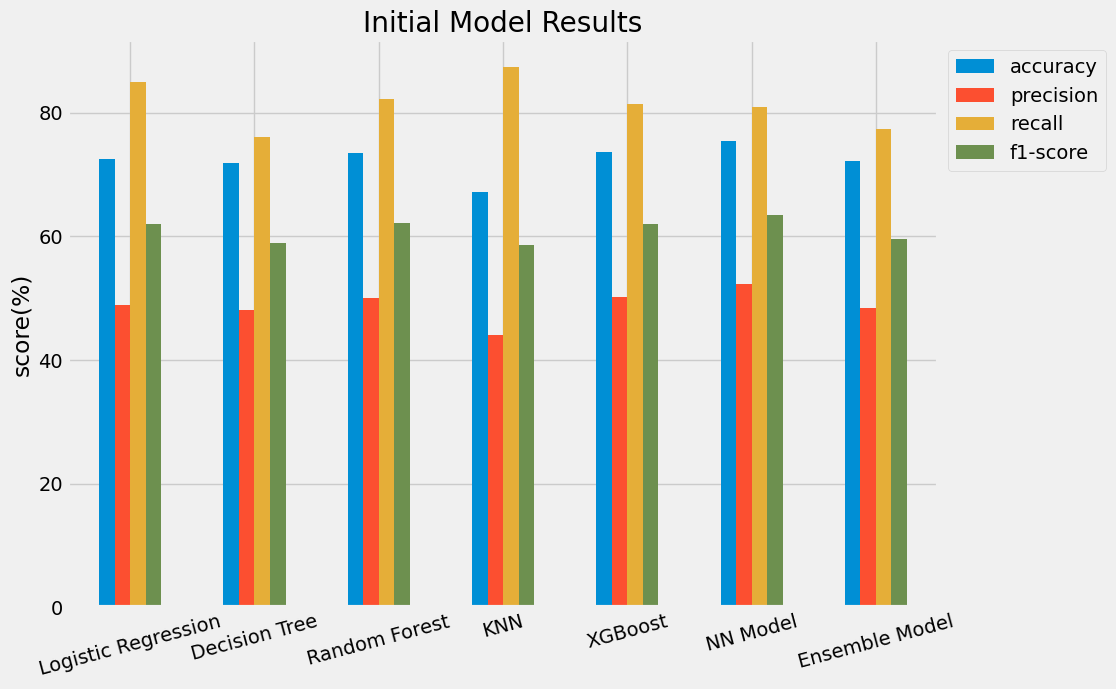

In [ ]:
scores_df.plot(kind='bar', title='Initial Model Results', ylabel='score(%)', rot=15).legend(bbox_to_anchor=(1.0, 1.0));

In [ ]:
scores_df_cv = pd.DataFrame(cv_test_scores).T
scores_df_cv

,accuracy,precision,recall,f1-score
Logistic Regression,72.03,48.42,86.29,62.03
Decision Tree,70.75,46.68,73.66,57.14
Random Forest,73.38,49.84,81.45,61.84
KNN,67.62,44.13,83.87,57.83
XGBoost,73.45,49.92,82.26,62.13


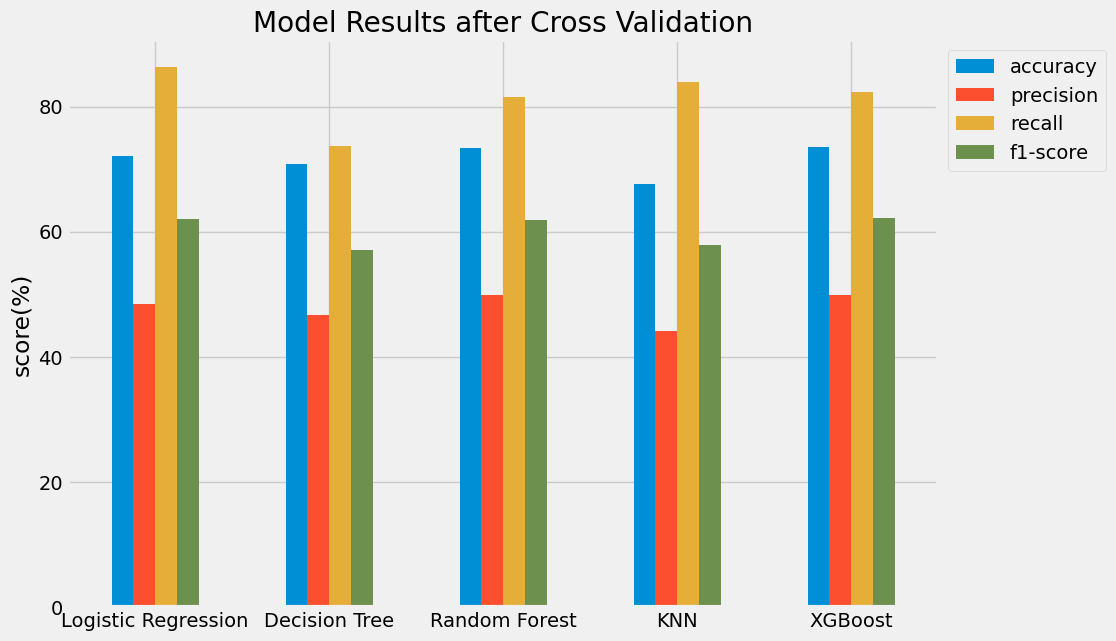

In [ ]:
scores_df_cv.plot(kind='bar', title='Model Results after Cross Validation', ylabel='score(%)', rot=0).legend(bbox_to_anchor=(1.0, 1.0));

## Comparing f1-scores

In [ ]:
model_f1 = scores_df.sort_values('f1-score', ascending=False)['f1-score']
model_f1

NN Model               63.50
Random Forest          62.20
XGBoost                62.09
Logistic Regression    62.02
Ensemble Model         59.57
Decision Tree          58.90
KNN                    58.56
Name: f1-score, dtype: float64

In [ ]:
cv_f1 = scores_df_cv.sort_values('f1-score', ascending=False)['f1-score']
cv_f1

XGBoost                62.13
Logistic Regression    62.03
Random Forest          61.84
KNN                    57.83
Decision Tree          57.14
Name: f1-score, dtype: float64

In [ ]:
f1_df = pd.concat([model_f1, cv_f1], axis=1, keys=['initial_model', 'cv_model']).sort_values(['initial_model', 'cv_model'], ascending=False)
f1_df

,initial_model,cv_model
NN Model,63.50,NaN
Random Forest,62.20,61.84
XGBoost,62.09,62.13
Logistic Regression,62.02,62.03
Ensemble Model,59.57,NaN
Decision Tree,58.90,57.14
KNN,58.56,57.83


In [ ]:
# f1_df.dropna().plot(kind='bar', title='Models\' F1 scores', ylabel='score(%)', rot=0).legend(bbox_to_anchor=(1.0, 1.0));

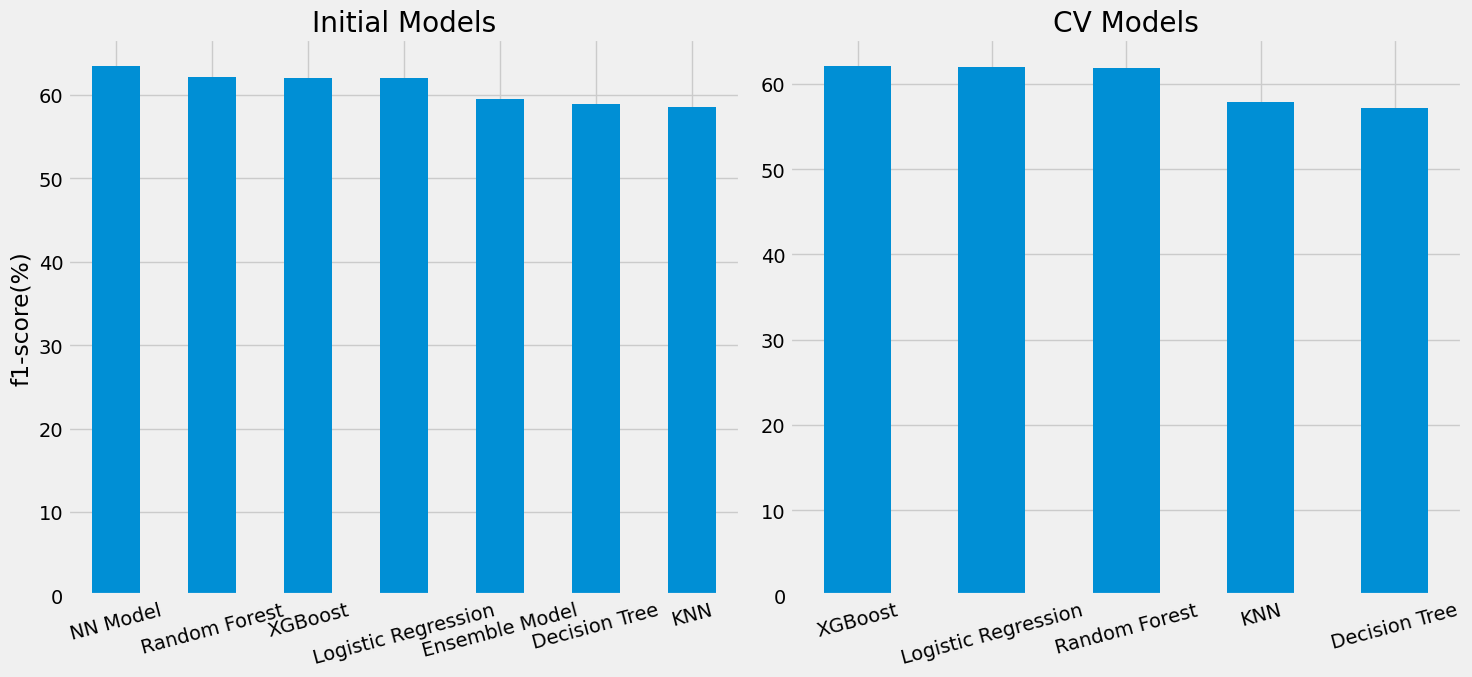

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
scores_df.sort_values('f1-score', ascending=False)['f1-score'].plot(kind='bar', ylabel='f1-score(%)',
                                                                    title='Initial Models', rot=15)
plt.subplot(1, 2, 2)
scores_df_cv.sort_values('f1-score', ascending=False)['f1-score'].plot(kind='bar',
                                                                       title='CV Models', rot=15)
plt.tight_layout();

# XGBoost and NN models are the best performing model

## Plot confusion matrix for the best performing models

In [ ]:
trained_models.keys()

dict_keys(['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost'])

### Confision Matrix for XGBoost Model

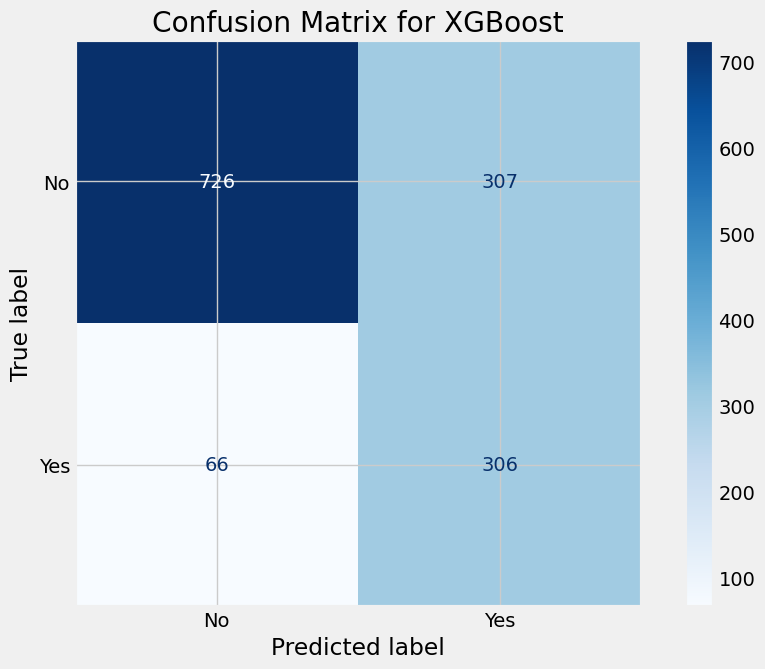

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

xgb_preds = trained_models['XGBoost'].best_estimator_.predict(X_test_pca)
cm = confusion_matrix(y_test.to_numpy(), xgb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost');

### Confusion Matrix for NN Model

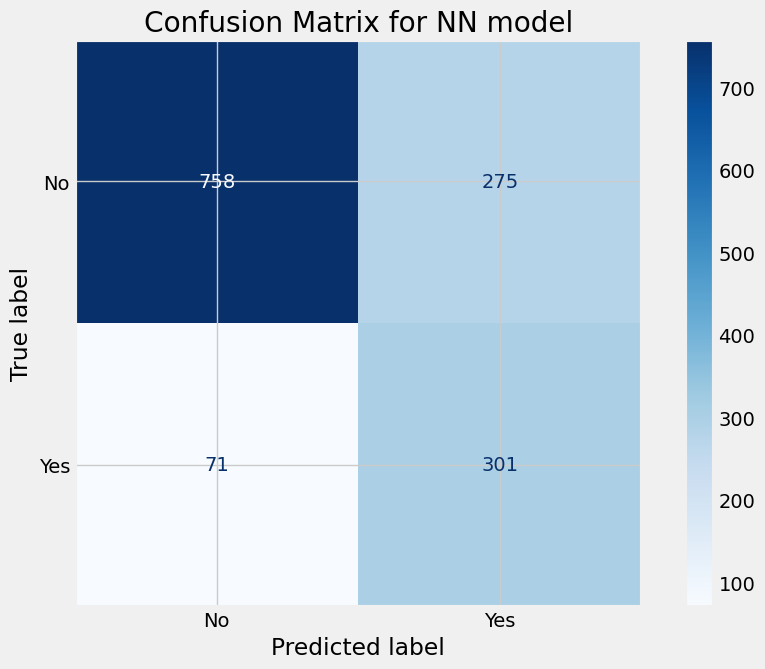

In [ ]:
cm = confusion_matrix(y_test.to_numpy(), nn_model_preds.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for NN model');

## F1 scores for each class

In [ ]:
from sklearn.metrics import classification_report
clf_dict_xgb = classification_report(y_test.to_numpy(), xgb_preds, output_dict=True, target_names=['No', 'Yes'])
clf_dict_nn = classification_report(y_test.to_numpy(), nn_model_preds.numpy(), output_dict=True, target_names=['No', 'Yes'])

In [ ]:
clf_dict_xgb, clf_dict_nn

({'No': {'precision': 0.9166666666666666,
   'recall': 0.7028073572120038,
   'f1-score': 0.7956164383561644,
   'support': 1033},
  'Yes': {'precision': 0.499184339314845,
   'recall': 0.8225806451612904,
   'f1-score': 0.6213197969543147,
   'support': 372},
  'accuracy': 0.7345195729537367,
  'macro avg': {'precision': 0.7079255029907559,
   'recall': 0.7626940011866471,
   'f1-score': 0.7084681176552395,
   'support': 1405},
  'weighted avg': {'precision': 0.8061304205635509,
   'recall': 0.7345195729537367,
   'f1-score': 0.7494681461131123,
   'support': 1405}},
 {'No': {'precision': 0.9143546441495778,
   'recall': 0.7337850919651501,
   'f1-score': 0.8141783029001074,
   'support': 1033},
  'Yes': {'precision': 0.5225694444444444,
   'recall': 0.8091397849462365,
   'f1-score': 0.6350210970464135,
   'support': 372},
  'accuracy': 0.7537366548042704,
  'macro avg': {'precision': 0.7184620442970111,
   'recall': 0.7714624384556933,
   'f1-score': 0.7245996999732605,
   'support'

In [ ]:
f1_dict_xgb = {}
for k, v in clf_dict_xgb.items():
  if k == 'accuracy':
    break
  else:
    f1_dict_xgb[k] = v['f1-score']

f1_dict_xgb

{'No': 0.7956164383561644, 'Yes': 0.6213197969543147}

In [ ]:
f1_dict_nn = {}
for k, v in clf_dict_nn.items():
  if k == 'accuracy':
    break
  else:
    f1_dict_nn[k] = v['f1-score']

f1_dict_nn

{'No': 0.8141783029001074, 'Yes': 0.6350210970464135}

In [ ]:
# plt.figure()
# plt.subplot(1, 2, 1)
# plt.bar(f1_dict_xgb.keys(), f1_dict_xgb.values())
# plt.title('XGBoost model')
# plt.ylabel('score(%)')

# plt.subplot(1, 2, 2)
# plt.bar(f1_dict_nn.keys(), f1_dict_nn.values())
# plt.title('NN model')
# plt.ylabel('score(%)')
# plt.suptitle('F1 score for each class');

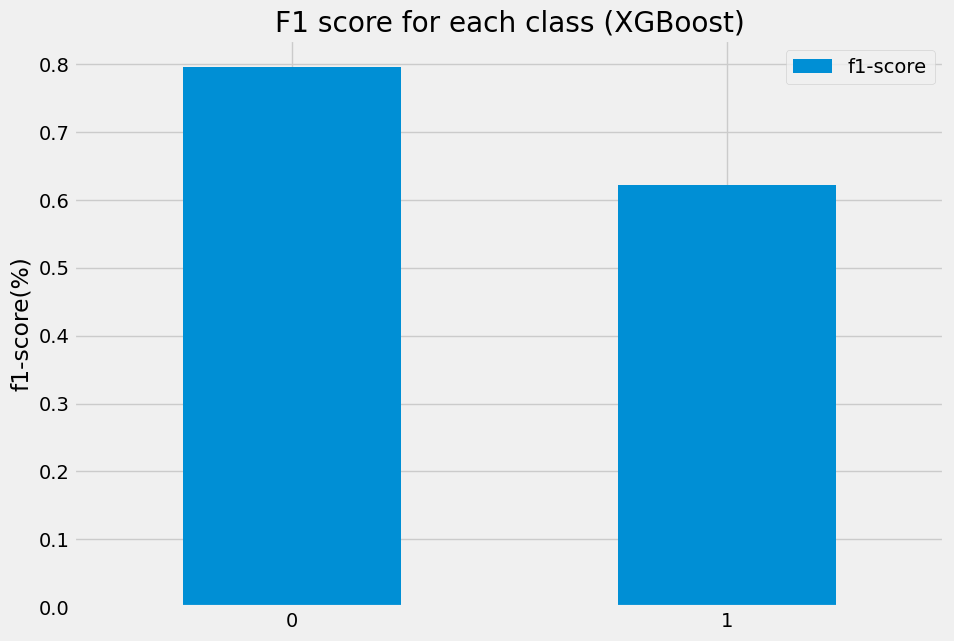

In [ ]:
pd.DataFrame({'class_name': f1_dict_xgb.keys(),
              'f1-score': f1_dict_xgb.values()}).plot(kind='bar',
                                                  title='F1 score for each class (XGBoost)',
                                                  ylabel='f1-score(%)', rot=0);

<Axes: title={'center': 'F1 score for each class (NN Model)'}, ylabel='f1-score(%)'>

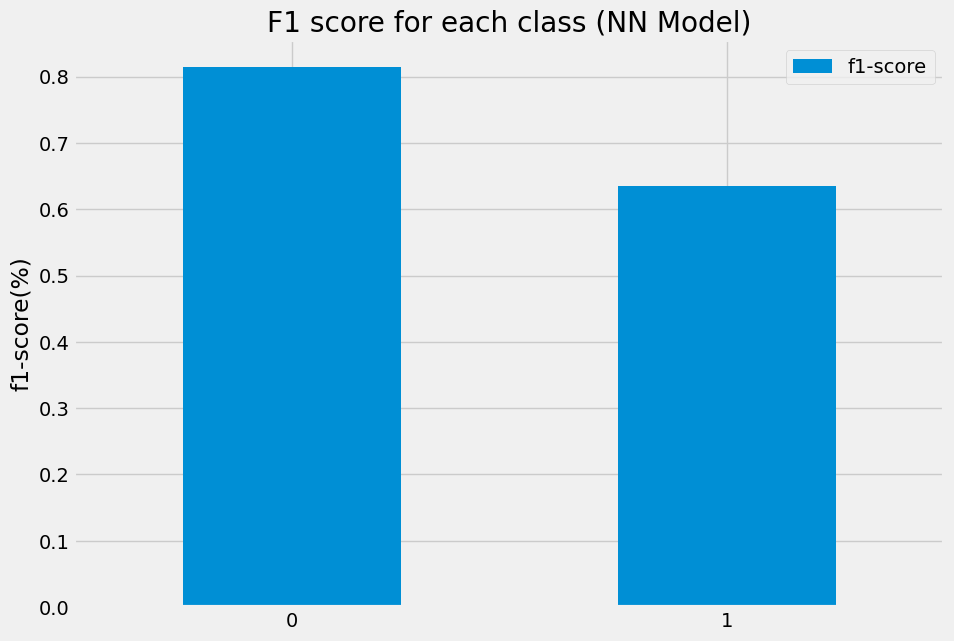

In [ ]:
pd.DataFrame({'class_name': f1_dict_nn.keys(),
              'f1-score': f1_dict_nn.values()}).plot(kind='bar',
                                                  title='F1 score for each class (NN Model)',
                                                  ylabel='f1-score(%)', rot=0)

## References

1. Scikit-learn. "sklearn.model_selection.RandomizedSearchCV." Available at: [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

2. Pandey, Shubham. "Hyperparameter Tuning the Random Forest in Python using Scikit-Learn." Towards Data Science, 2019. Available at: [https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74).

3. Brownlee, Jason. "Stacking Ensemble Machine Learning with Python." Machine Learning Mastery, 2020. Available at: [https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).

4. Brownlee, Jason. "Random Oversampling and Undersampling for Imbalanced Classification." Machine Learning Mastery, 2020. Available at: [https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/).

5. Scikit-learn. "sklearn.metrics.precision_recall_fscore_support." Available at: [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).